# <p style="padding:10px; background-color:white; margin:10; color:black; font-family:'New Times Roman'; font-size:100%; text-align:center;border-radius: 10px 10px; overflow:hidden; font-weight:50"> **EDA** for **KING COUNTY HOUSE SALES DATASETS** from **KAGGLE** which has **21 features.**</p>

### 📖 Introduction About the Data :

**The dataset**  
The goal is to predict the `price` of a given house (Regression Analysis) using the **King County House Sales dataset** from **Kaggle**.

There are **21 independent variables (including `id`)**:

- `id` : Unique identifier for each house sale  
- `date` : Date of the house sale  
- `price` : Sale price of the house (target variable)  
- `bedrooms` : Number of bedrooms  
- `bathrooms` : Number of bathrooms (where .5 accounts for a half bath)  
- `sqft_living` : Interior living space in square feet  
- `sqft_lot` : Total lot size in square feet  
- `floors` : Number of floors in the house  
- `waterfront` : Whether the house has a waterfront view (1: yes, 0: no)  
- `view` : An index from 0 to 4 indicating the quality of the view  
- `condition` : Condition of the house (graded numerically)  
- `grade` : Overall grade of the house based on construction and design quality  
- `sqft_above` : Square footage of house excluding basement  
- `sqft_basement` : Square footage of the basement  
- `yr_built` : Year the house was built  
- `yr_renovated` : Year the house was renovated (0 if never renovated)  
- `zipcode` : Zip code where the house is located  
- `lat` : Latitude coordinate  
- `long` : Longitude coordinate  
- `sqft_living15` : Living area of the nearest 15 neighbors  
- `sqft_lot15` : Lot size of the nearest 15 neighbors  

**Target variable**:

- `price` : Sale price of the house  

**Dataset Source Link**: [https://www.kaggle.com/datasets/harlfoxem/housesalesprediction](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)


### Importing libraries

In [211]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Check if dataset exist

In [212]:
# Check if dataset exists
data_path = "./house_data.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The dataset file '{data_path}' was not found.")

### Read Dataset

In [213]:
df = pd.read_csv(data_path)
df.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [214]:
print(f'Size of dataset: {df.size}')
print(f'Shape of dataset: {df.shape}')

Size of dataset: 453873
Shape of dataset: (21613, 21)


### Check dtypes and missing values

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Summary stats

In [216]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# <p style="padding:10px; background-color:white; margin:10; color:black; font-family:'New Times Roman'; font-size:100%; text-align:center;border-radius: 10px 10px; overflow:hidden; font-weight:50"> Check Missing Values and Duplicates in Dataset</p>

In [217]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### No Missing Values found in the dataset

In [218]:
df.duplicated().sum()

np.int64(0)

### No Duplicated data found

# <p style="padding:10px; background-color:white; margin:10; color:black; font-family:'New Times Roman'; font-size:100%; text-align:center;border-radius: 10px 10px; overflow:hidden; font-weight:50"> Descriptive Statistics</p>

In [219]:
numerical_columns = list(df.columns[df.dtypes != 'object'])
categorical_columns = list(df.columns[df.dtypes == 'object'])

# Print numerical columns with 10 per line
print(f"Numerical Columns: {len(numerical_columns)}")
for i in range(0, len(numerical_columns), 7):
    print(f"   {', '.join(repr(col) for col in numerical_columns[i:i+10])}")
    
# Print categorical columns
print(f"\nCategorical Columns: {len(categorical_columns)}\
      \n{categorical_columns}")

Numerical Columns: 20
   'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition'
   'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat'
   'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'

Categorical Columns: 1      
['date']


### Numerical and Categorical Columns Description

In [220]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [221]:
df[categorical_columns].describe().T

,count,unique,top,freq
date,21613,372,20140623T000000,142


### All unique values in dataset

In [222]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### Data Cleaning: Dropping `id` and `zipcode` Columns & Transforming `date` to Year Only

In [223]:
# drop 'id' and 'zipcode' column
df.drop(['id','zipcode'], axis=1, inplace=True)

# transform 'date' column
df['date'] = df['date'].str[:4]
df['date']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: object

# <p style="padding:10px; background-color:white; margin:10; color:black; font-family:'New Times Roman'; font-size:100%; text-align:center;border-radius: 10px 10px; overflow:hidden; font-weight:50"> Exploring Data ( Visualization )</p>

In [224]:
# Set visualization style
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Histogram

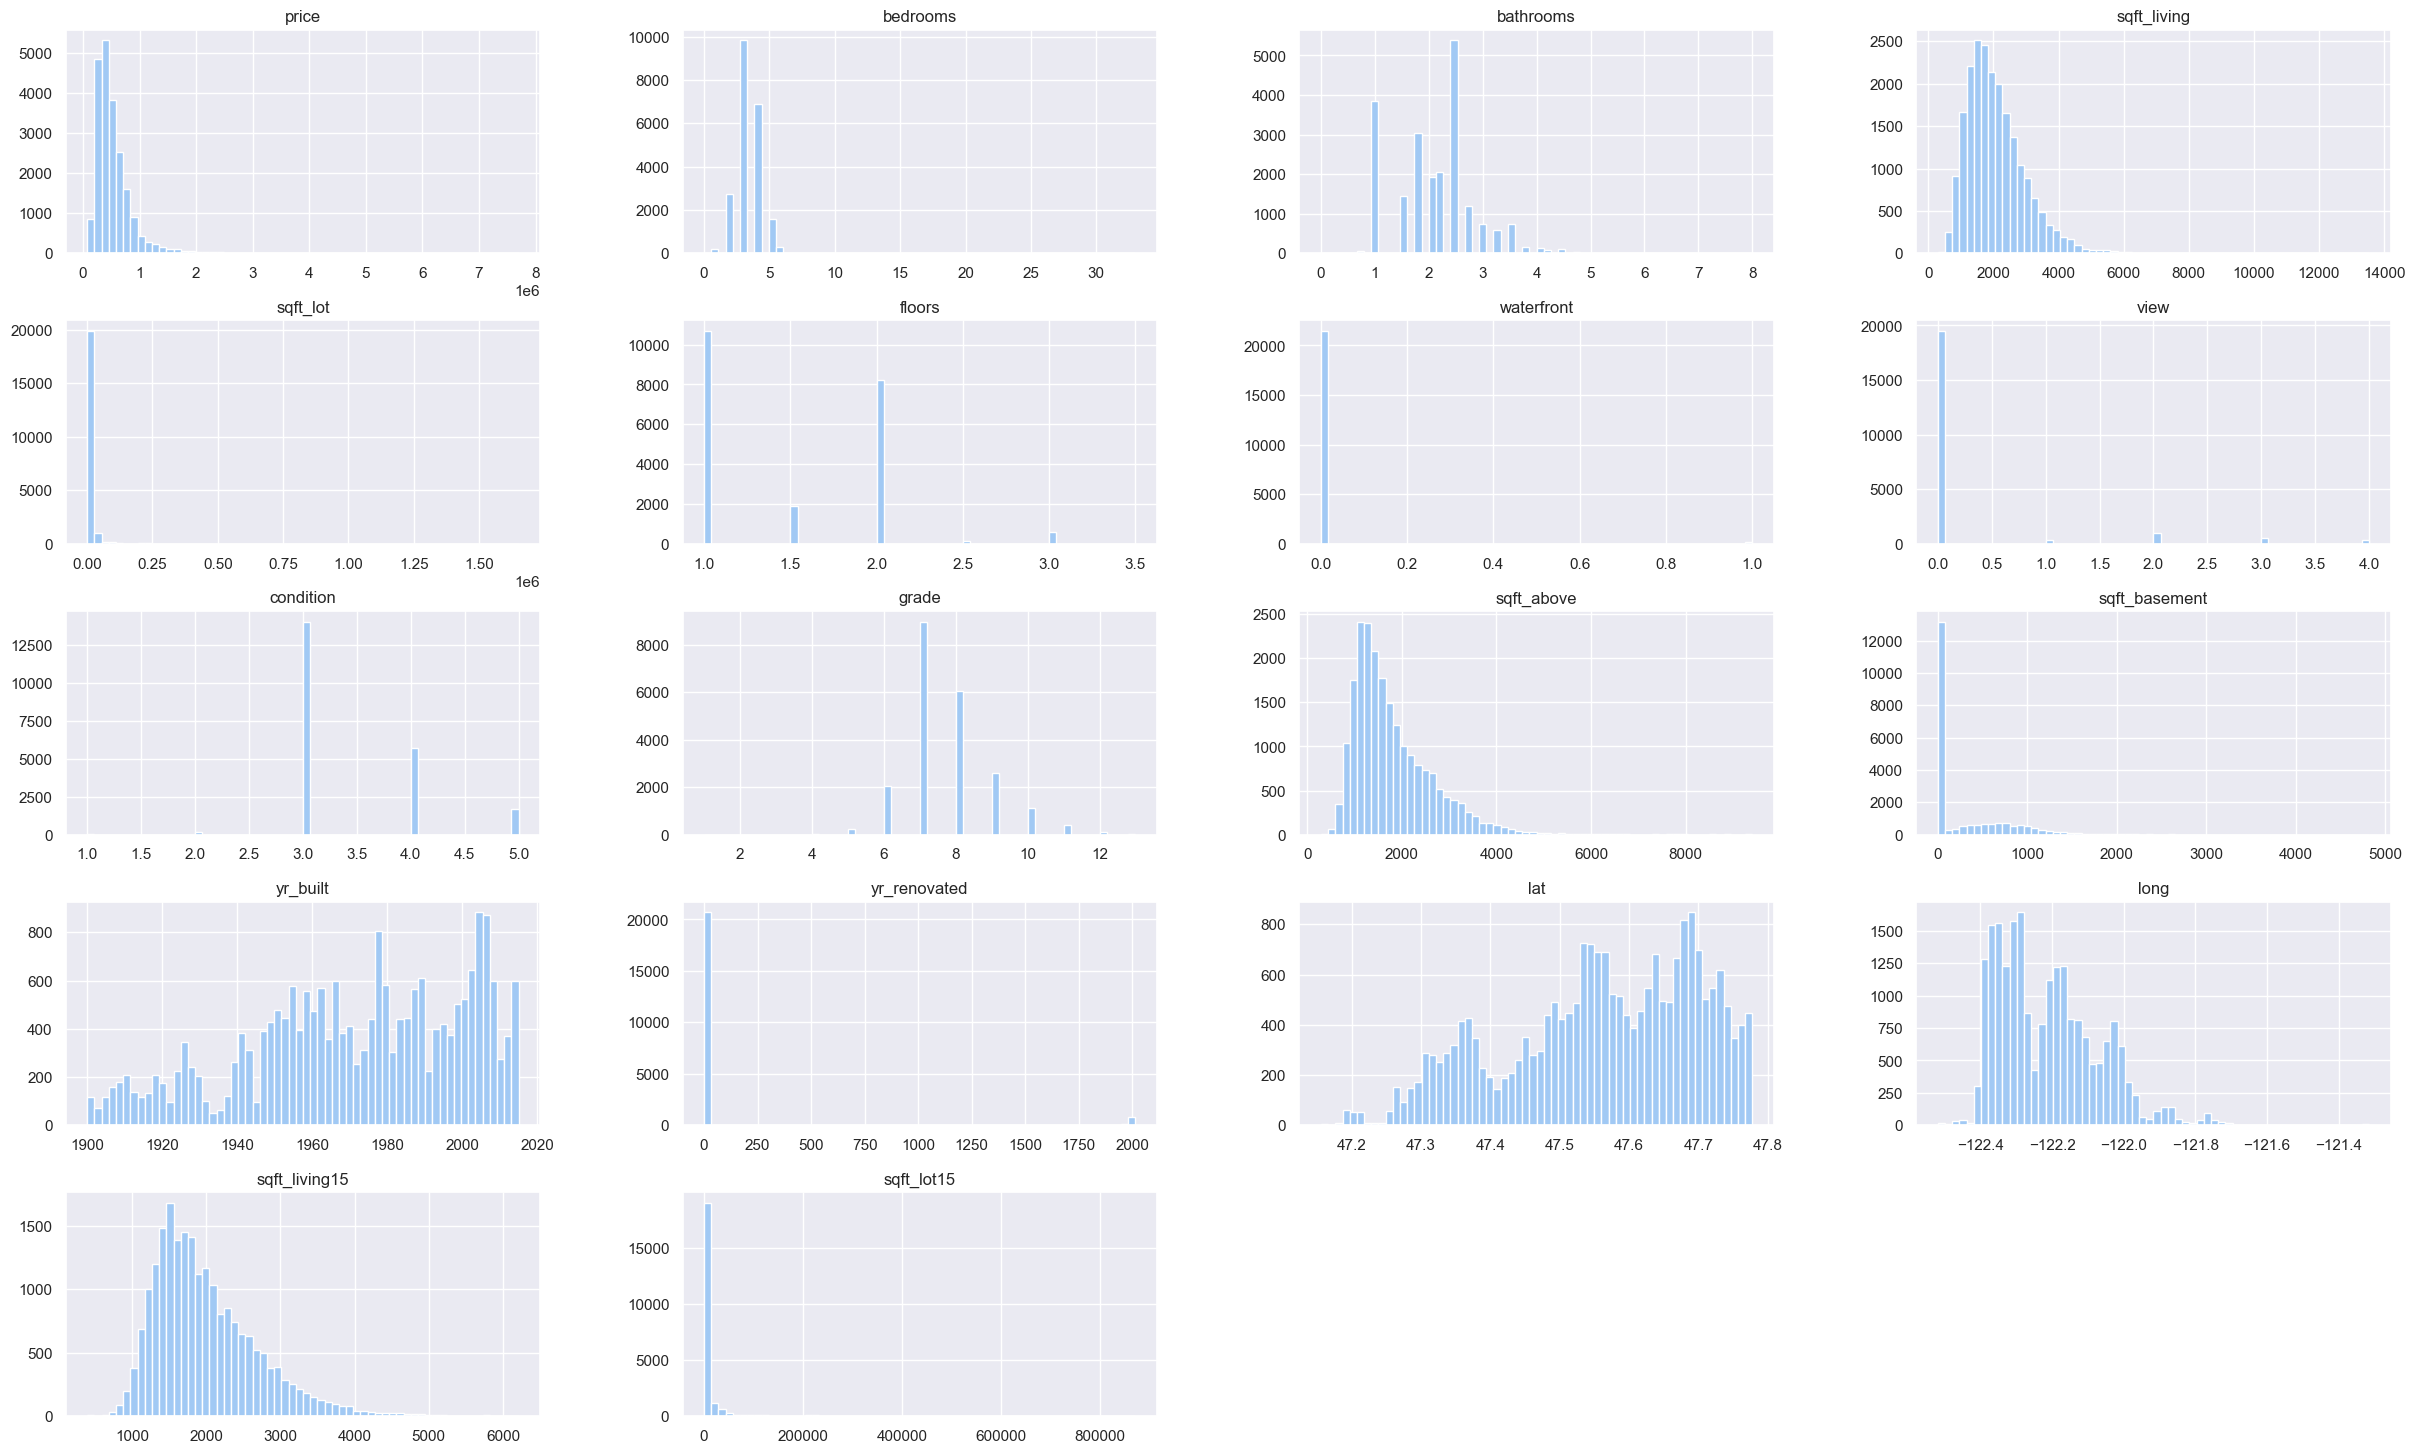

In [225]:
df.hist(bins=60,figsize=(30,18));

### Correlation Heatmap (Upper Triangle Masked) for Numeric Features

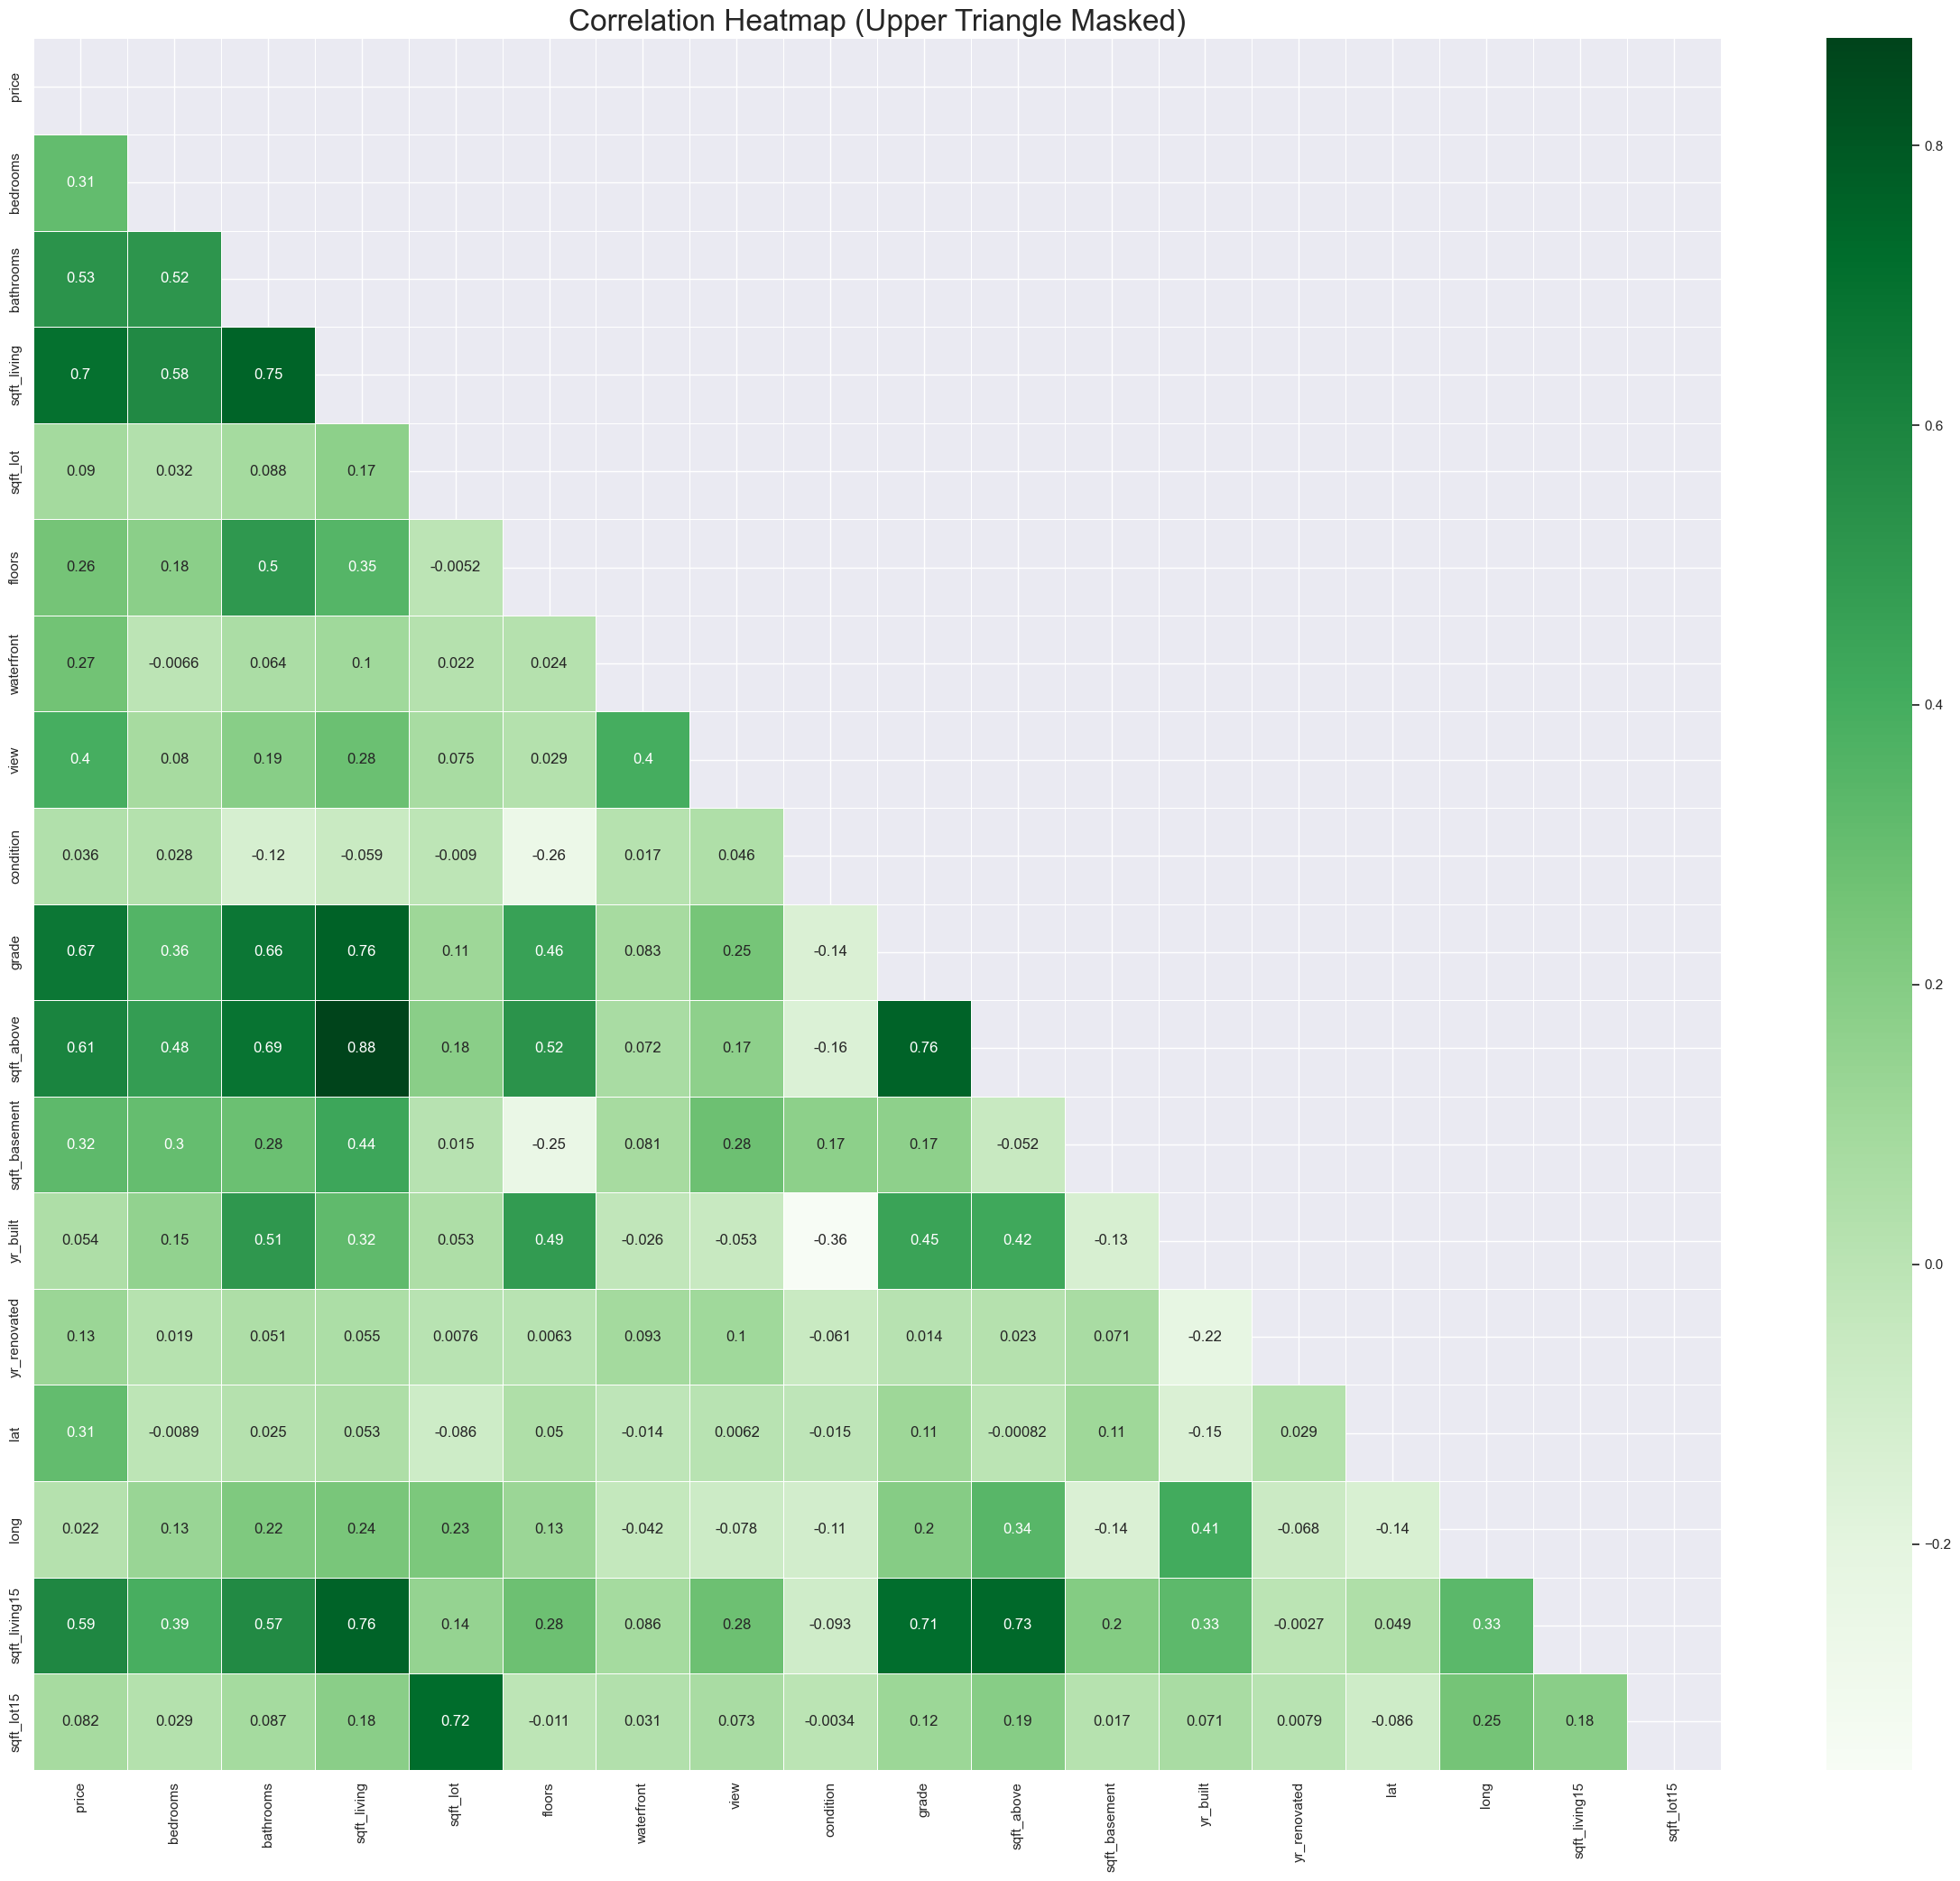

In [226]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
cor = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(24, 21))

# Draw the heatmap
sns.heatmap(cor, annot=True, mask=mask, cmap='Greens', linewidths=0.5)

# Adjust layout
plt.title('Correlation Heatmap (Upper Triangle Masked)', fontsize=24)
plt.tight_layout()
plt.show()

### Distribution Plots for All Numeric Features

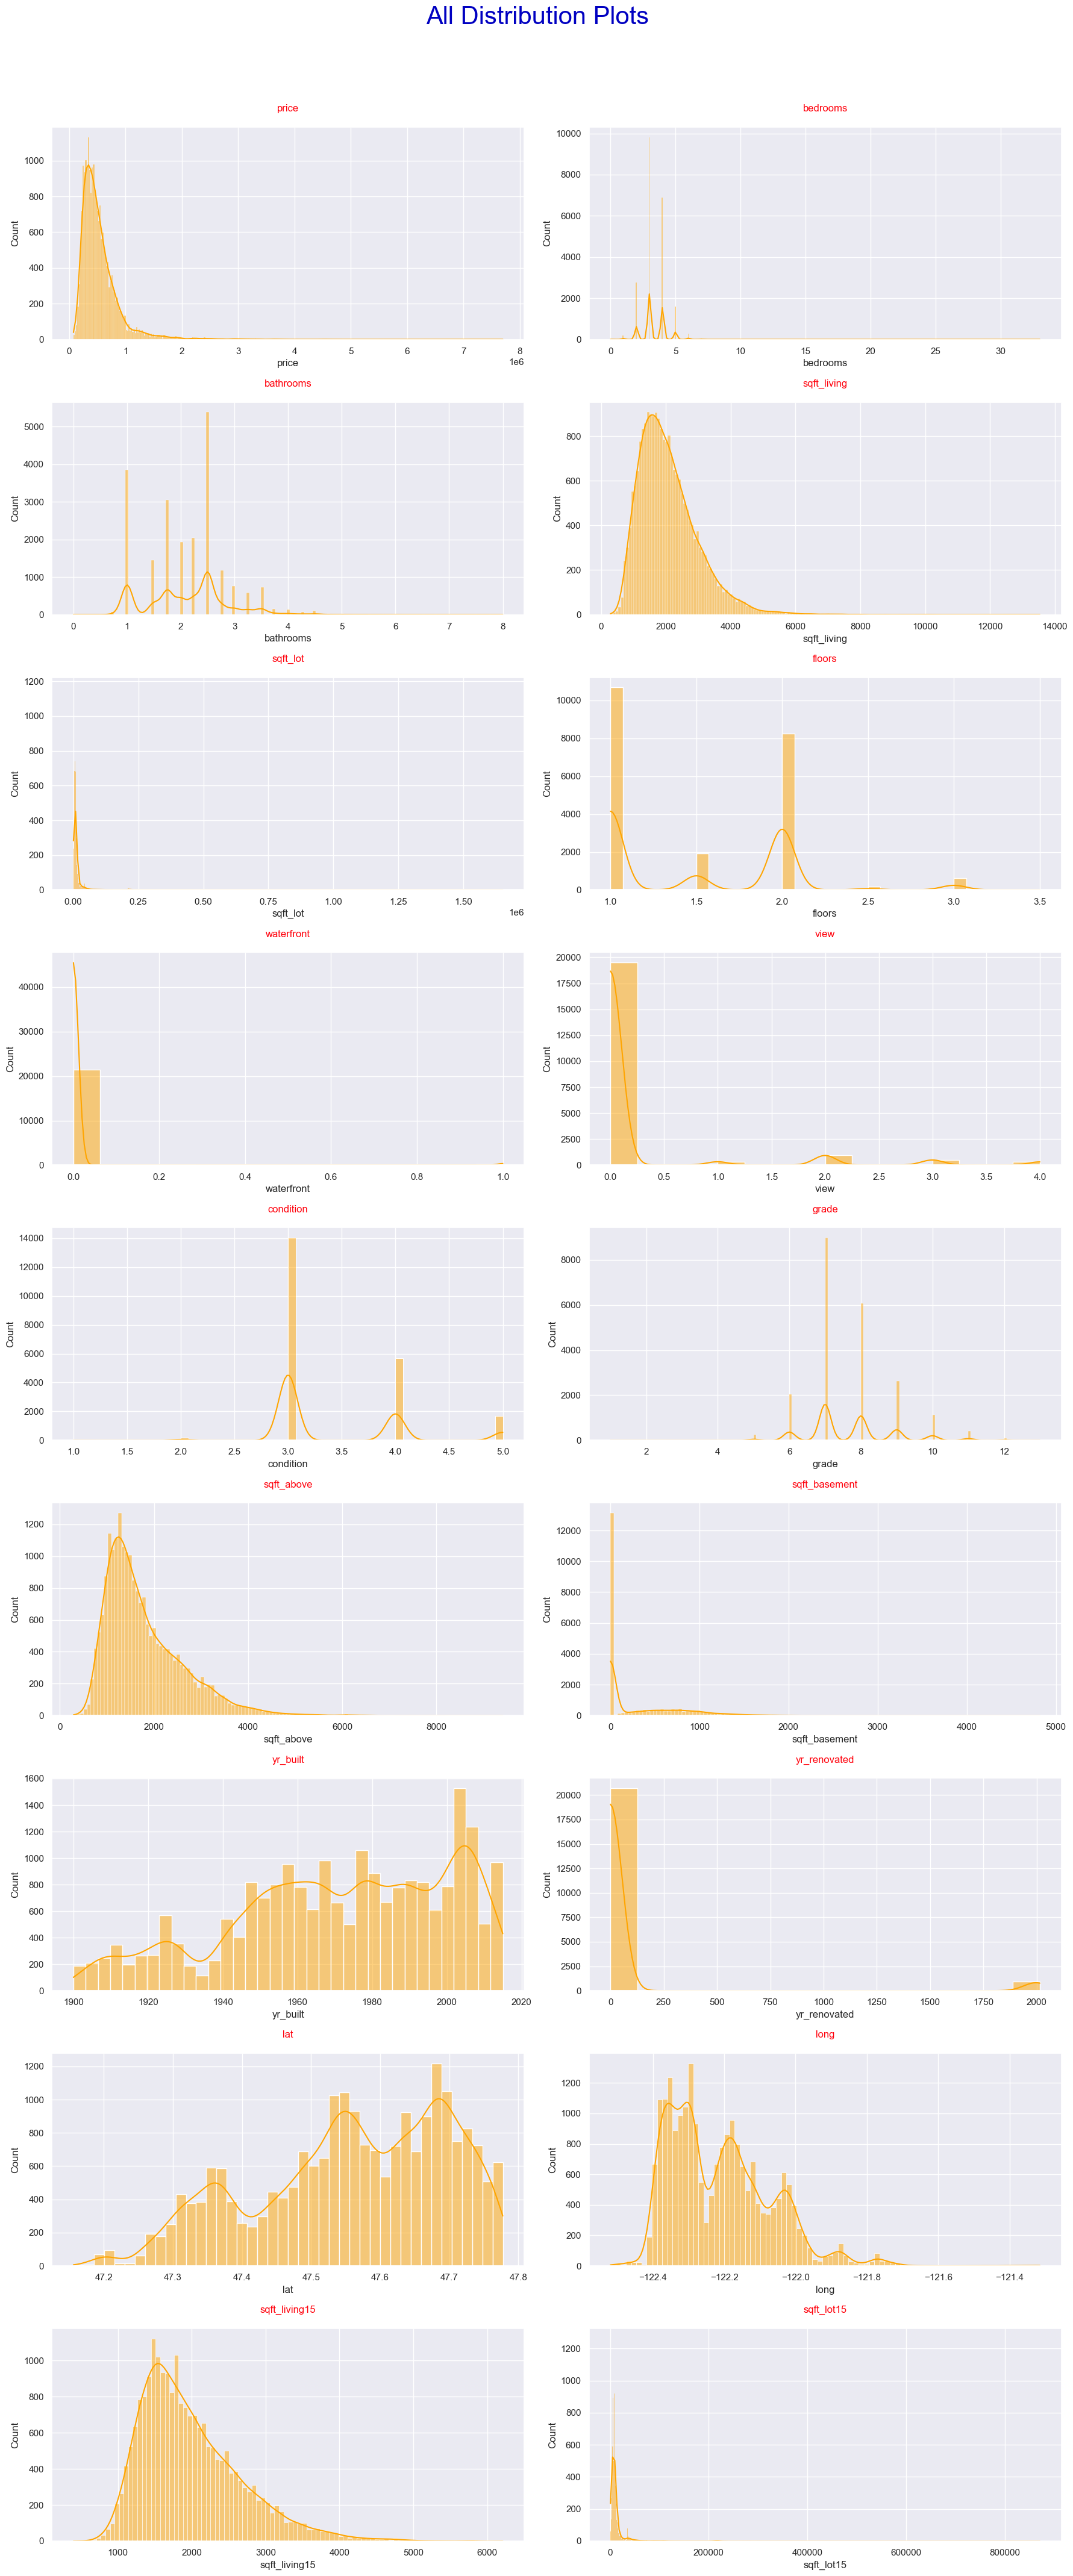

In [227]:

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / 2)

plt.figure(figsize=(18, 5 * num_rows))
plt.suptitle('All Distribution Plots\n', color='#0000C1', size=30)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 2, i)
    plt.title(f'{col}\n', color='#FF000B')
    sns.histplot(df[col], kde=True, color='orange')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


### Distribution Plots for price

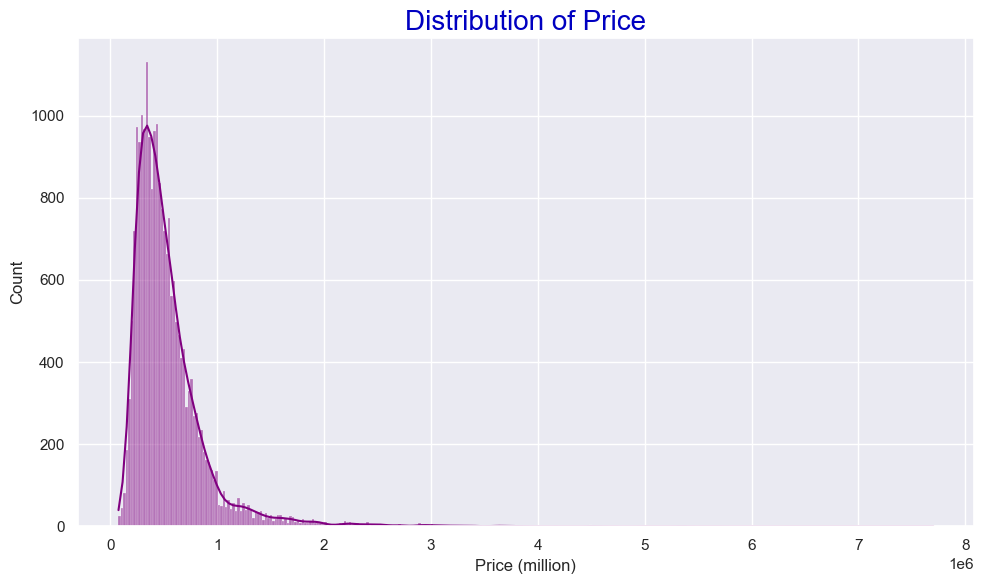

In [228]:
plt.figure(figsize=(10, 6))

sns.histplot(df['price'], kde=True, color='purple')
plt.xlabel('Price (million)')
plt.title('Distribution of Price', color='#0000C1', fontsize=20)

plt.tight_layout()
plt.show()


### Price vs. Living Area Colored by Condition

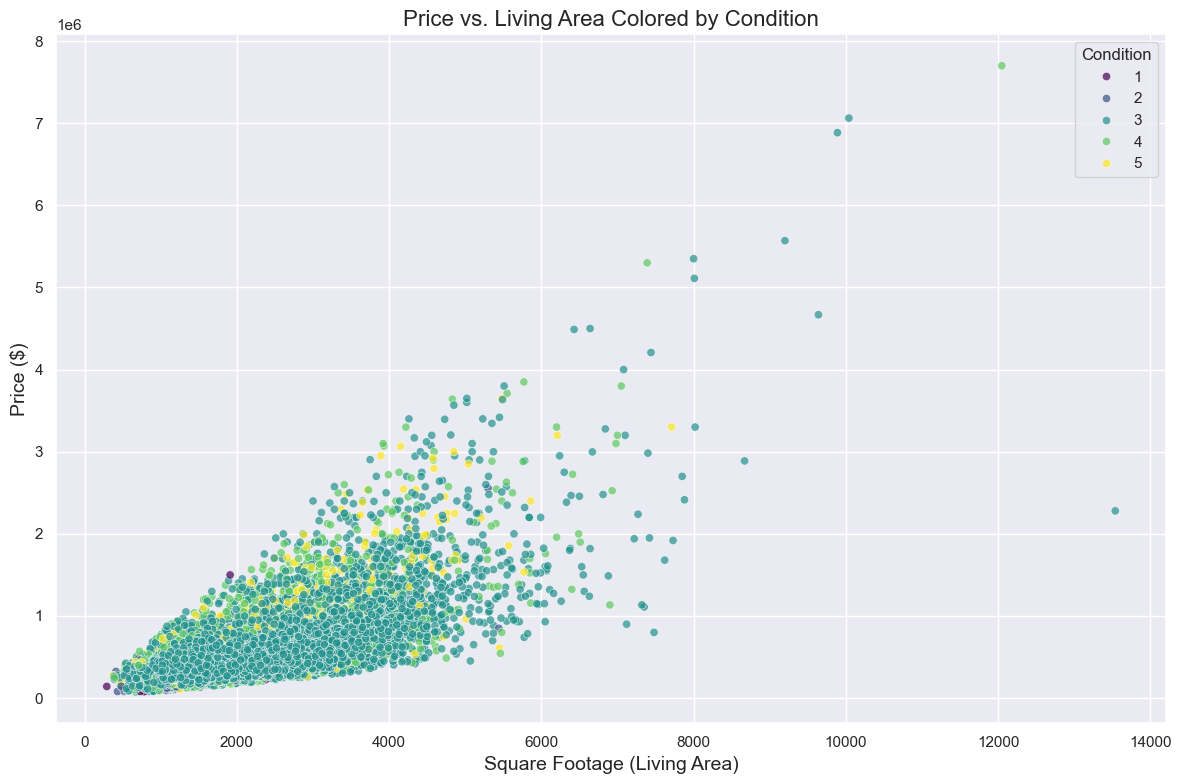

In [229]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft_living', y='price', hue='condition', palette='viridis', data=df, alpha=0.7)

plt.title('Price vs. Living Area Colored by Condition', fontsize=16)
plt.xlabel('Square Footage (Living Area)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Condition', loc='best')
plt.tight_layout()
plt.show()


### Price Distribution by Bedrooms and Bathrooms

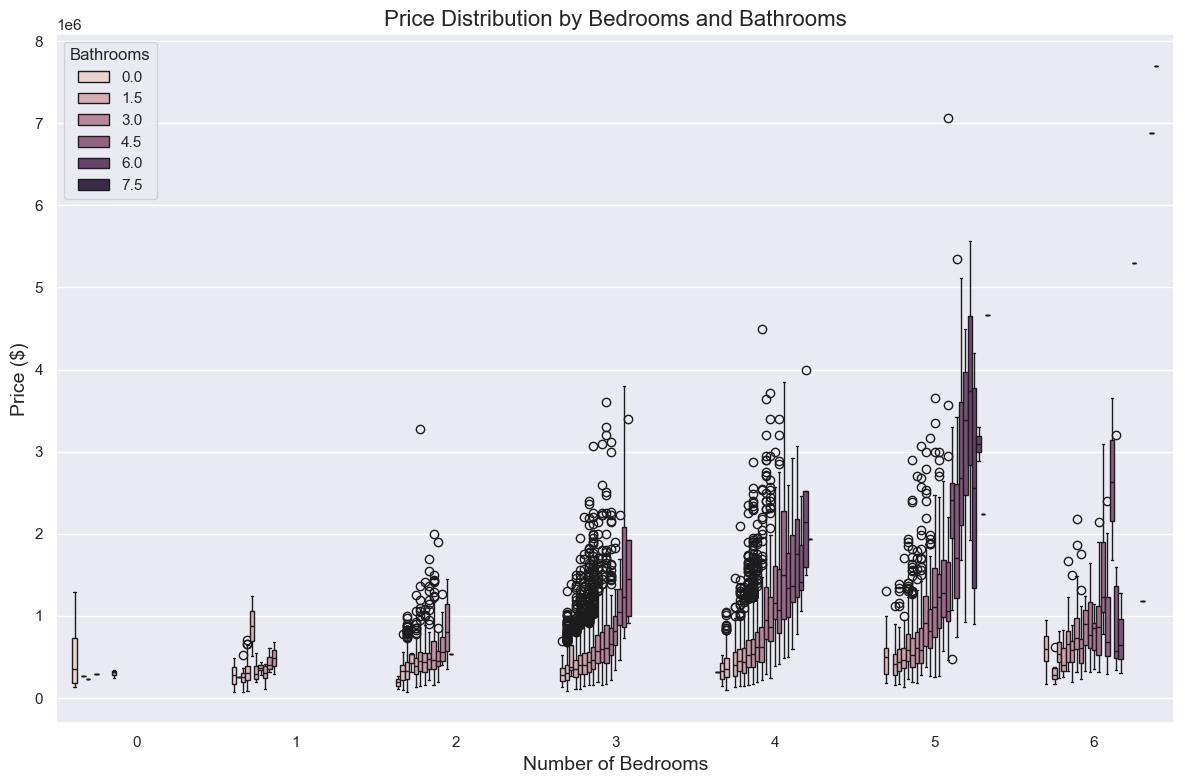

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bedrooms', y='price', hue='bathrooms', data=df[df['bedrooms'] <= 6])

plt.title('Price Distribution by Bedrooms and Bathrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Bathrooms', loc='best')
plt.tight_layout()
plt.show()


### Detecting Outliers in Price, Size, and Room Features Using Boxplots

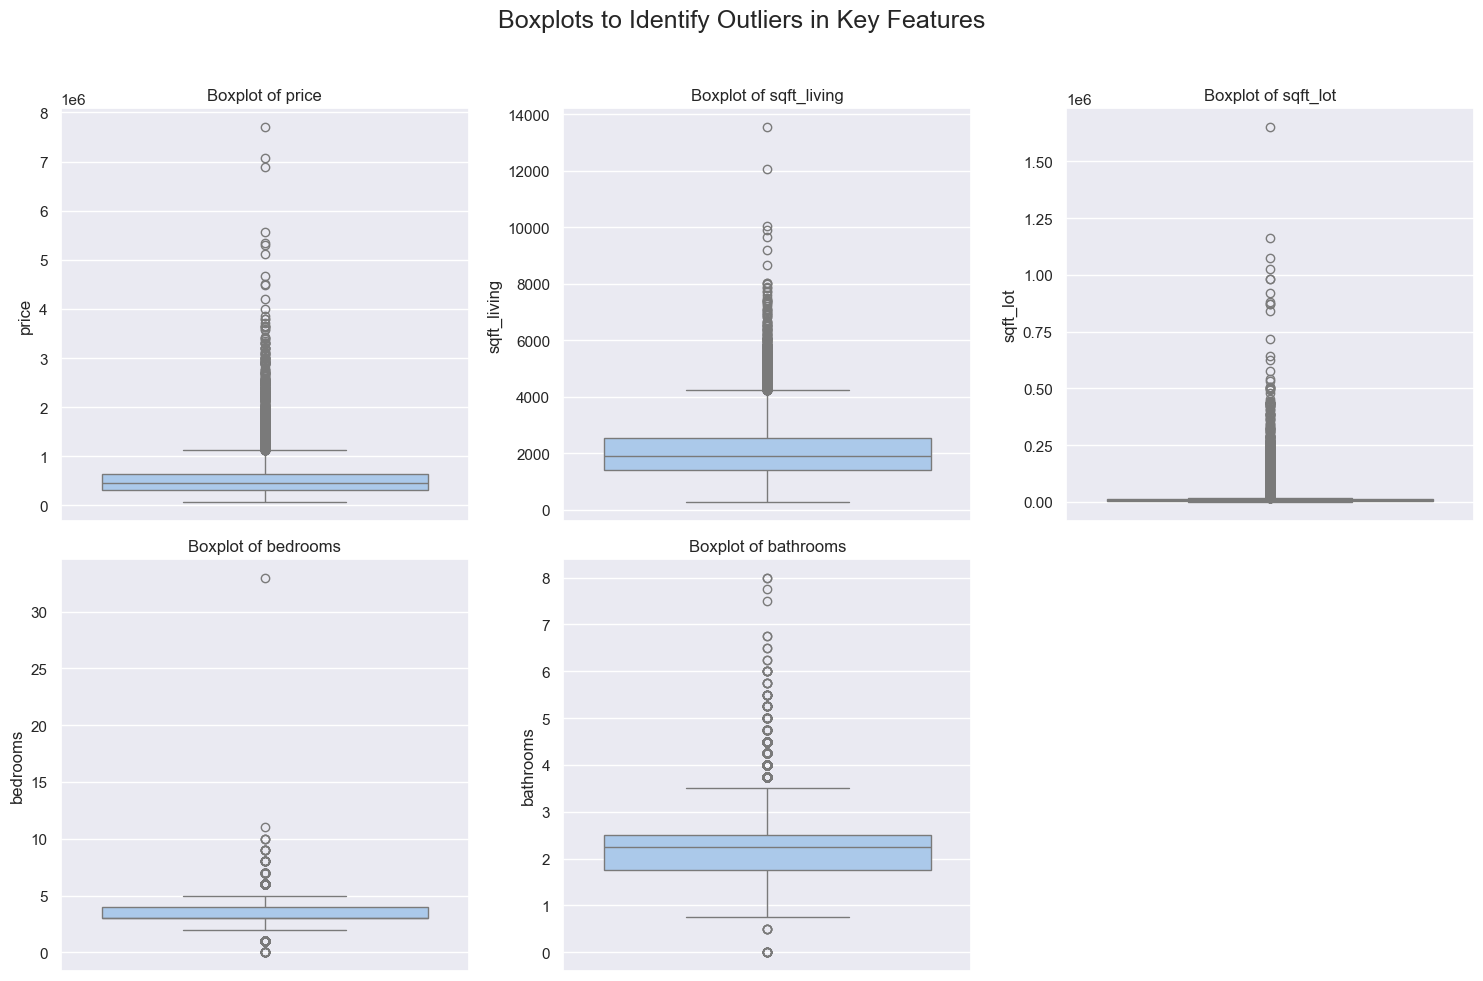

In [231]:
outlier_cols = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.suptitle('Boxplots to Identify Outliers in Key Features', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Multivariate Analysis: Pairwise Relationships of Key Housing Features

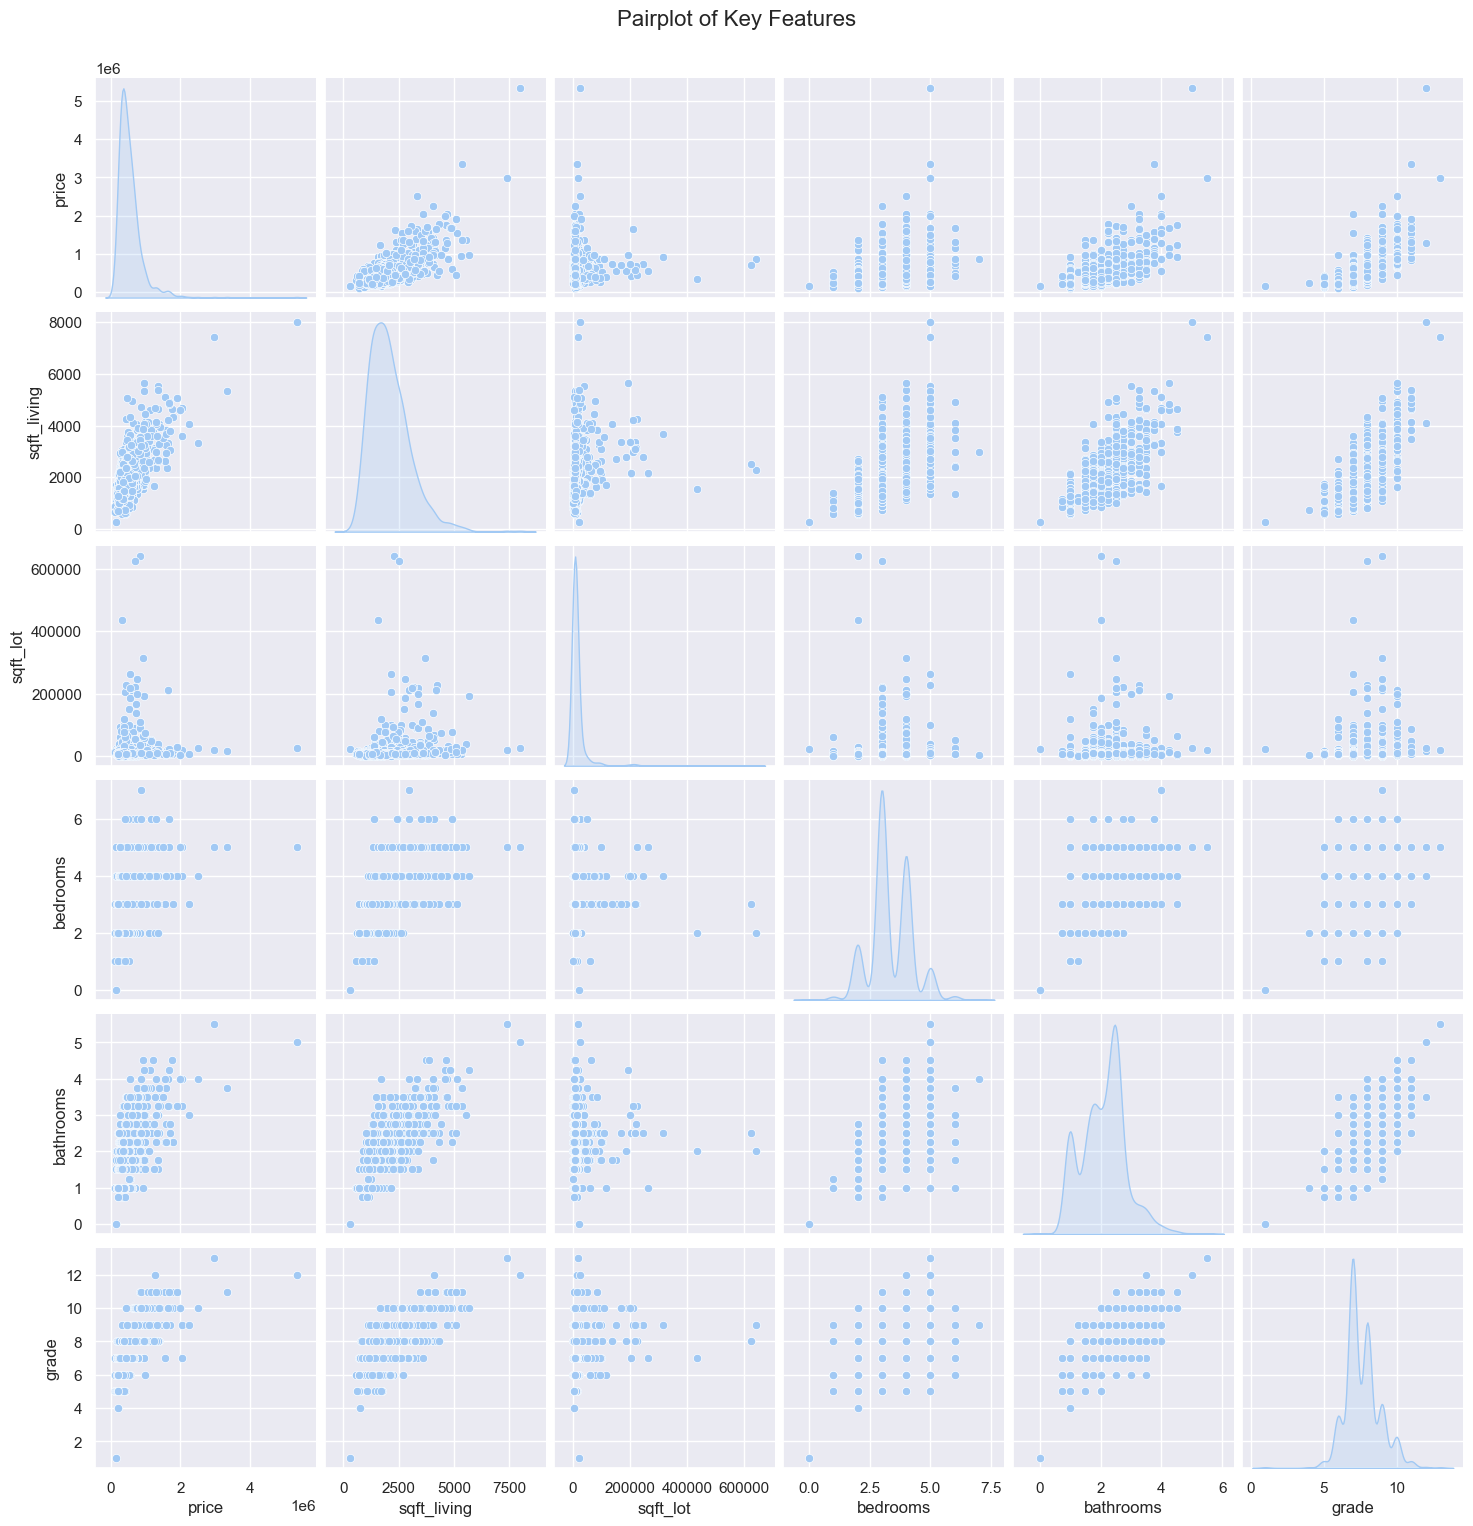

In [232]:
key_features = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade']
sns.pairplot(df[key_features].sample(1000), diag_kind='kde')

plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16)
plt.show()


### Categorical Features vs Target Feature Price Boxplot

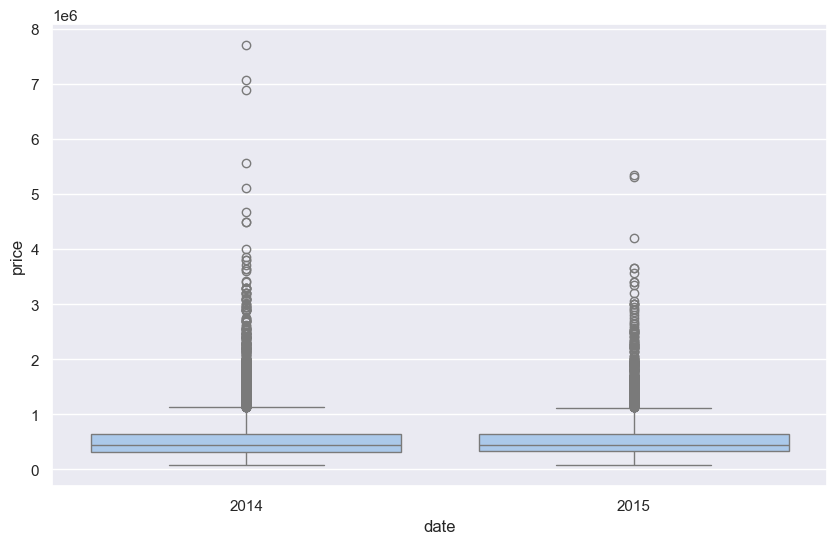

In [234]:
for i in categorical_columns:
    sns.boxplot(data=df, x=i , y='price')
    plt.show()